# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfm = pd.read_csv('C:\\Users\\SHADOW\\Technical Seminar\\IPL\\DATASETS\\matches.csv')
dfm.head()

,id,date,season,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,4/18/2008,2008,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,Asad Rauf,RE Koertzen
1,335983,4/19/2008,2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,MR Benson,SL Shastri
2,335984,4/19/2008,2008,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9,N,Aleem Dar,GA Pratapkumar
3,335985,4/20/2008,2008,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,N,SJ Davis,DJ Harper
4,335986,4/20/2008,2008,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5,N,BF Bowden,K Hariharan


In [776]:
dfm['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Sunrisers Hyderabad', 'Mumbai Indians'],
      dtype=object)

In [4]:
dfm['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Maharashtra Cricket Association St

In [777]:
dfd = pd.read_csv('C:\\Users\\SHADOW\\Technical Seminar\\IPL\\DATASETS\\deliveries.csv')
dfd.head()

,id,season,inning,batting_team,bowling_team,batsman,bowler,overs,batsman_runs,total_runs,is_wicket,player_dismissed,dismissal_kind,fielder,extra_runs,extras_type
0,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,0.1,0,1,0,No,Not Out,No,1,legbyes
1,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0.2,0,0,0,No,Not Out,No,0,Fair Delivery
2,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0.3,0,1,0,No,Not Out,No,1,wides
3,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0.4,0,0,0,No,Not Out,No,0,Fair Delivery
4,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0.5,0,0,0,No,Not Out,No,0,Fair Delivery


### Insights

### EDA1. Which is the favorite venue of BCCI to hold an IPL match?

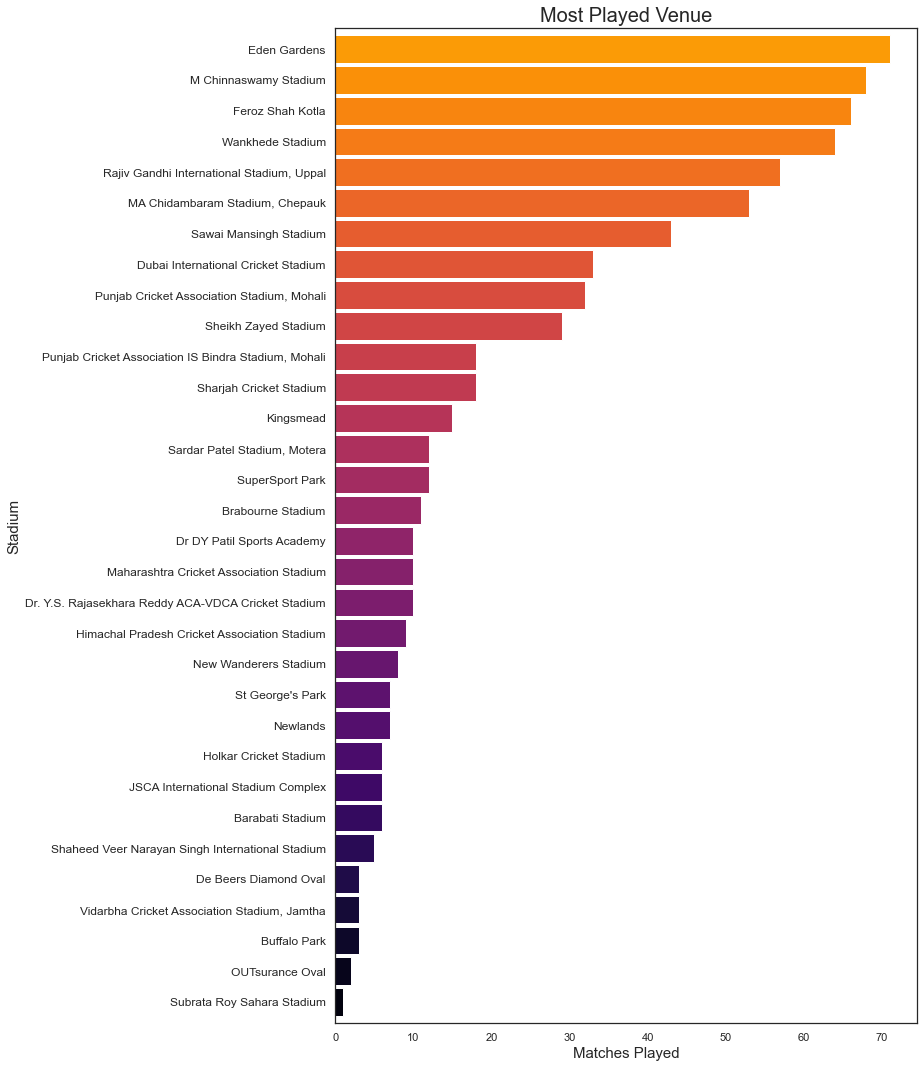

In [843]:
sns.set_style('white')

vn = dfm['venue'].value_counts()
vn = vn.sort_values(ascending = True).plot.barh(width = 0.9, color = sns.color_palette('inferno',40), figsize=(13,15))

plt.title('Most Played Venue', fontsize=20)
plt.ylabel('Stadium', fontsize=15)
plt.xlabel('Matches Played', fontsize=15)
plt.yticks(fontsize=12)
plt.show()

It's Eden Gardens

### EDA2. Maximum man of the match awards won by the player?

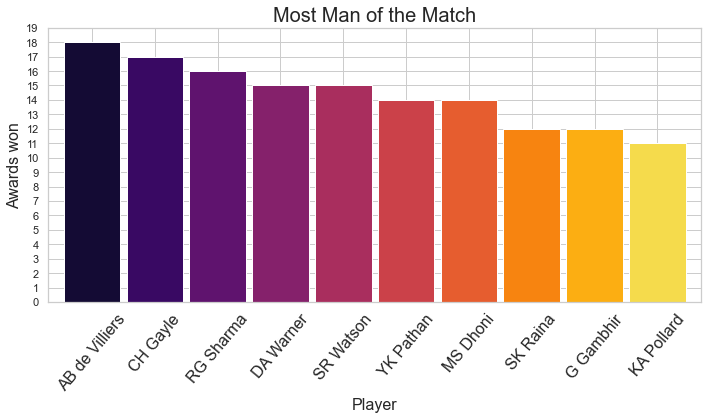

In [860]:
sns.set_style('whitegrid')

mom = dfm['player_of_match'].value_counts()
mom = mom[:10]
mom = mom.sort_values(ascending = False).plot.bar(width = 0.9, color = sns.color_palette('inferno',10),figsize=(10,6))

plt.title('Most Man of the Match', fontsize=20)
plt.ylabel('Awards won', fontsize=16)
plt.xlabel('Player', fontsize=16)
y_ticks = np.arange(0, 20, 1)
plt.yticks(y_ticks)
plt.xticks(rotation=50,fontsize=16)
plt.show()

No surprise, it's AB de Villiers

### EDA3. How many matches won by chasing vs defending by the teams?

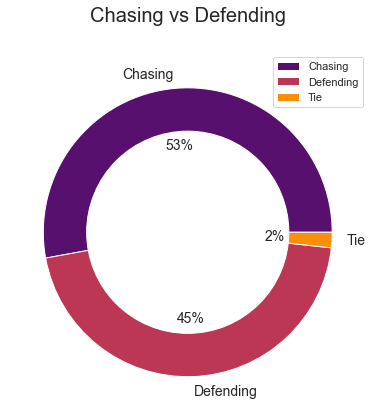

In [813]:
sns.set_style('white')
plt.figure(figsize=(6,6))

cvd = dfm['result'].value_counts()
mylabels = ['Chasing', 'Defending', 'Tie']

plt.pie(cvd, labels = mylabels,autopct='%1.0f%%',textprops={'fontsize': 14}, colors = sns.color_palette('inferno',3))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Chasing vs Defending', fontsize=20, pad=30)
plt.legend()
plt.show() 


More chance to win a match while chasing the target

### EDA4. Teams preference to bat or bowl first after winning the toss?

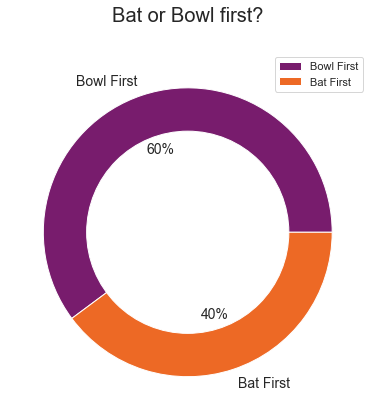

In [818]:
sns.set_style('white')
plt.figure(figsize=(6,6))

bb = dfm['toss_decision'].value_counts()
mylabels = ['Bowl First', 'Bat First']

plt.pie(bb, labels = mylabels,autopct='%1.0f%%',textprops={'fontsize': 14}, colors = sns.color_palette('inferno',2))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Bat or Bowl first?', fontsize=20, pad=30)
plt.legend()
plt.show() 

Teams prefer to chase than to defend, since EDA4 suggests that there is more chance of winning while chasing.

### EDA5. Winning the toss has any impact on the match result?

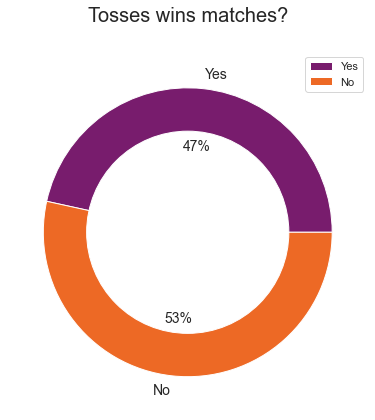

In [816]:
sns.set_style('white')
plt.figure(figsize=(6,6))

dft=dfm[dfm['toss_winner']==dfm['winner']]
slices=[len(dft),(len(dfm)-len(dft))]
mylabels=['Yes','No']

plt.pie(slices,labels=mylabels,autopct='%1.0f%%', textprops={'fontsize': 14}, colors = sns.color_palette('inferno',2))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Tosses wins matches?', fontsize=20, pad=30)
plt.legend()
plt.show()

Luckily teams performance is going to decide the outcome of the game not the toss.

### EDA6. Does the above perception changes based on venue?

In [783]:
xy = dft['venue'].value_counts().reset_index()
yes = pd.DataFrame(xy)
yes.drop([29], inplace=True)
yes = yes.rename(columns = {'index':'venue', 'venue':'yes'}).sort_values(by = 'venue').reset_index()
yes.drop(columns = 'index', inplace = True)
yes

,venue,yes
0,Barabati Stadium,4
1,Brabourne Stadium,7
2,Buffalo Park,2
3,De Beers Diamond Oval,2
4,Dr DY Patil Sports Academy,6
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,3
6,Dubai International Cricket Stadium,11
7,Eden Gardens,38
8,Feroz Shah Kotla,22
9,Himachal Pradesh Cricket Association Stadium,4


In [784]:
dft2 = dfm[dfm['toss_winner']!=dfm['winner']]
yz = dft2['venue'].value_counts().reset_index()
no = pd.DataFrame(yz)
no = no.rename(columns = {'index':'venue', 'venue':'no'}).sort_values(by = 'venue').reset_index()
no.drop(columns = 'index', inplace = True)
no

,venue,no
0,Barabati Stadium,2
1,Brabourne Stadium,4
2,Buffalo Park,1
3,De Beers Diamond Oval,1
4,Dr DY Patil Sports Academy,4
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,7
6,Dubai International Cricket Stadium,22
7,Eden Gardens,33
8,Feroz Shah Kotla,44
9,Himachal Pradesh Cricket Association Stadium,5


In [785]:
v_toss = yes.join(no.set_index('venue'), on='venue', how='left')
v_toss = v_toss.set_index('venue')
v_toss

,yes,no
venue,,
Barabati Stadium,4,2
Brabourne Stadium,7,4
Buffalo Park,2,1
De Beers Diamond Oval,2,1
Dr DY Patil Sports Academy,6,4
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,3,7
Dubai International Cricket Stadium,11,22
Eden Gardens,38,33
Feroz Shah Kotla,22,44


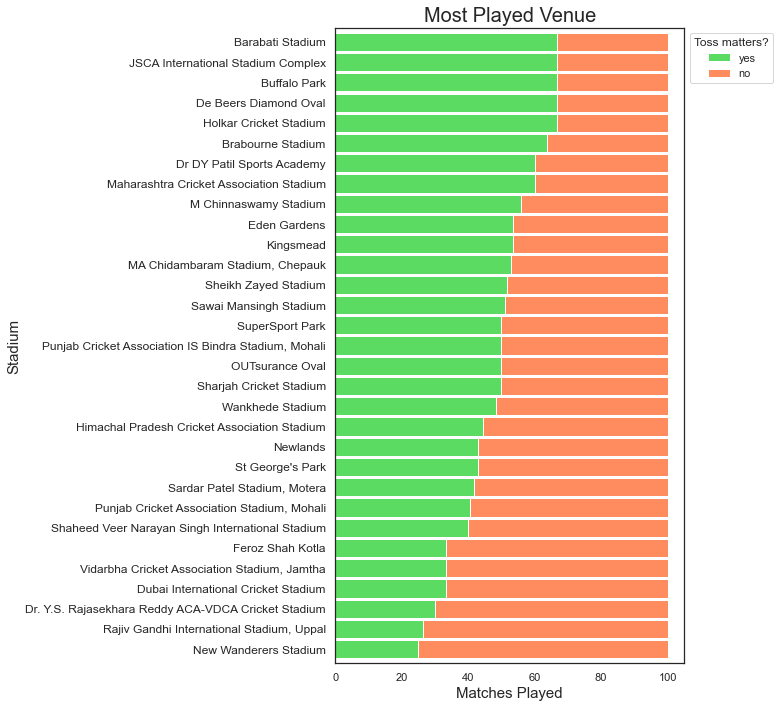

In [786]:
sns.set_style('white')

v_stack = v_toss.apply(lambda x: x*100/sum(x), axis=1).sort_values(by = 'yes')
v_stack = v_stack.plot.barh(stacked=True, width = 0.9,figsize=(11,10), color={'yes':'#5cdb62', 'no':'#ff8c5e'})

plt.title('Most Played Venue', fontsize=20)
plt.ylabel('Stadium', fontsize=15)
plt.xlabel('Matches Played', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.0), title='Toss matters?')

plt.show()

Yes, the importance of the toss varies from ground to ground

### EDA7. Which team has won most number of IPL seasons? 

In [787]:
entries = []
for i in range(2008,2021):
    sw = (dfm[dfm['season']==i]).iloc[-1]
    entries.append(sw[[2,9]].values)

season_winners = pd.DataFrame(entries, columns = ['season', 'winner'])
season_winners

,season,winner
0,2008,Rajasthan Royals
1,2009,Sunrisers Hyderabad
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


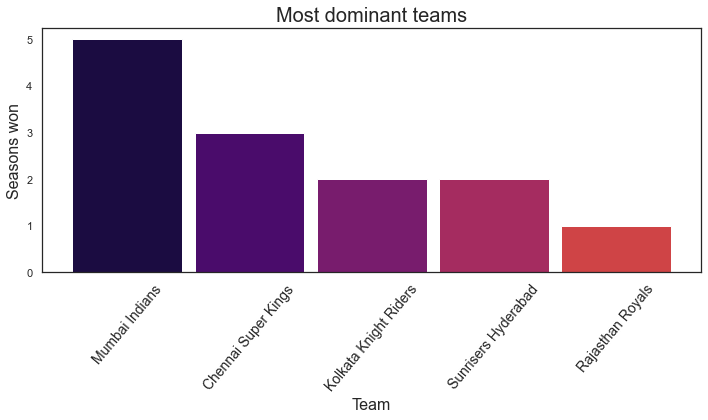

In [821]:
sns.set_style('white')
plt.figure(figsize=(10,6))

winner = season_winners['winner'].value_counts()
winner = winner.sort_values(ascending = False).plot.bar(width = 0.9, color = sns.color_palette('inferno',8))

plt.title('Most dominant teams', fontsize=20)
plt.ylabel('Seasons won', fontsize=16)
plt.xlabel('Team', fontsize=16)
plt.xticks(rotation = 50, fontsize=14)
plt.show()


Mumbai Indians has been the most successful team with 5 season wins. 

### EDA8. Highest win in the history of IPL?

In [789]:
dfr = dfm[dfm['result']=='runs']
h_rmargin = dfr['result_margin'].max()
h_defend = dfr.loc[dfr.result_margin == h_rmargin]

In [790]:
h_defend

,id,date,season,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
510,1082635,5/6/2017,2017,LMP Simmons,Feroz Shah Kotla,Delhi Capitals,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146,N,Nitin Menon,CK Nandan


Highest win margin by runs is 146

In [791]:
dfw = dfm[dfm['result']=='wickets']
h_wmargin = dfw['result_margin'].max()
h_chase = dfw.loc[dfw.result_margin == h_wmargin]

In [792]:
h_chase

,id,date,season,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
12,335994,4/27/2008,2008,AC Gilchrist,Dr DY Patil Sports Academy,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10,N,Asad Rauf,SL Shastri
60,392183,4/19/2009,2009,DL Vettori,Newlands,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,field,Delhi Capitals,wickets,10,N,MR Benson,SD Ranade
124,419115,3/18/2010,2010,JH Kallis,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,10,N,K Hariharan,DJ Harper
213,501263,5/20/2011,2011,SR Watson,Wankhede Stadium,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,Rajasthan Royals,wickets,10,N,RE Koertzen,PR Reiffel
274,548377,5/20/2012,2012,DR Smith,Sawai Mansingh Stadium,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,Mumbai Indians,wickets,10,N,HDPK Dharmasena,C Shamshuddin
286,598007,4/10/2013,2013,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,10,N,Aleem Dar,C Shamshuddin
424,829757,4/26/2015,2015,VR Aaron,Feroz Shah Kotla,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,10,N,M Erasmus,S Ravi
505,1082626,4/30/2017,2017,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,Delhi Capitals,Kings XI Punjab,field,Kings XI Punjab,wickets,10,N,YC Barde,CK Nandan
566,1136608,5/14/2018,2018,UT Yadav,Holkar Cricket Stadium,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,10,N,BNJ Oxenford,VK Sharma
641,1216495,11/3/2020,2020,S Nadeem,Sharjah Cricket Stadium,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10,N,C Shamshuddin,RK Illingworth


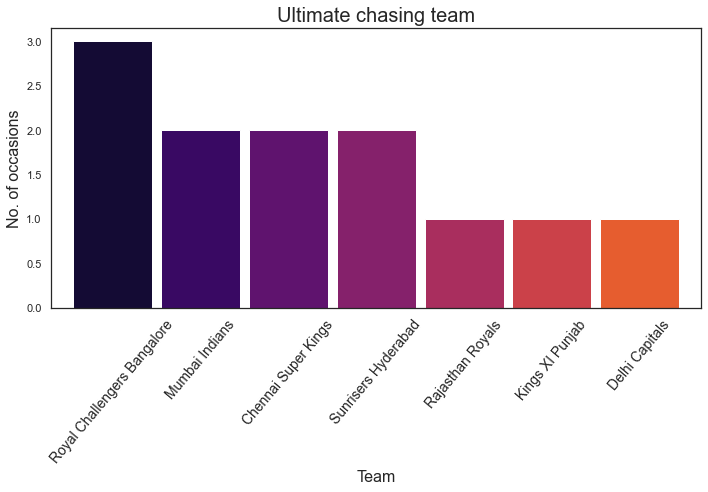

In [839]:
sns.set_style('white')

winr = h_chase['winner'].value_counts()
winr = winr.sort_values(ascending = False).plot.bar(width = 0.9, color = sns.color_palette('inferno',10),figsize=(10,7))

plt.title('Ultimate chasing team', fontsize=20)
plt.ylabel('No. of occasions', fontsize=16)
plt.xlabel('Team', fontsize=16)
plt.xticks(rotation = 50, fontsize=14)
plt.show()


RCB chased down the target without losing any wicket on most number of occasions

### EDA9. Highest run getter in IPL history?

In [794]:
h_runs = pd.concat([pd.DataFrame(dfd.batsman),pd.DataFrame(dfd.total_runs)],axis=1)
h_runs = h_runs.groupby('batsman').sum().sort_values(by = 'total_runs', ascending=False).head().reset_index()
h_runs

,batsman,total_runs
0,V Kohli,5303
1,S Dhawan,5090
2,RG Sharma,4991
3,DA Warner,4933
4,CH Gayle,4537


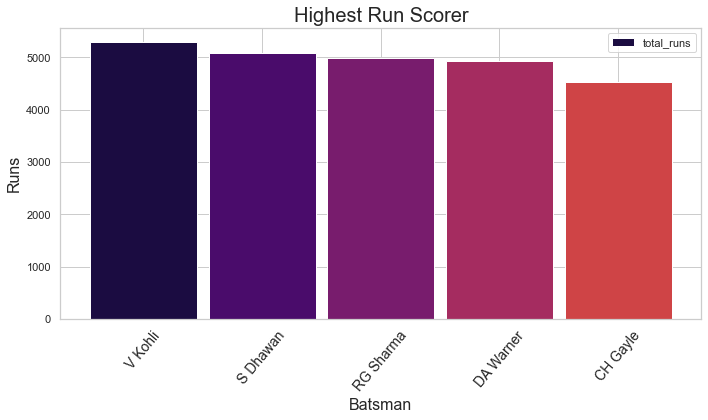

In [861]:
sns.set_style('whitegrid')

h_runs.plot(x = 'batsman', y= 'total_runs', width = 0.9, color = sns.color_palette('inferno',8), kind='bar',figsize=(10,6))

plt.title('Highest Run Scorer', fontsize=20)
plt.ylabel('Runs', fontsize=16)
plt.xlabel('Batsman', fontsize=16)
plt.xticks(rotation = 50, fontsize=14)
plt.show()

Virat Kohli is the leading run scorer with 5329 runs.

### EDA10. Highest wicket taker in the IPL history?

In [796]:
h_wick = pd.concat([pd.DataFrame(dfd.bowler),pd.DataFrame(dfd.is_wicket)],axis=1)
h_wick = h_wick.groupby('bowler').sum().sort_values(by = 'is_wicket', ascending=False).head().reset_index()
h_wick

,bowler,is_wicket
0,SL Malinga,170
1,PP Chawla,155
2,A Mishra,152
3,DJ Bravo,150
4,Harbhajan Singh,148


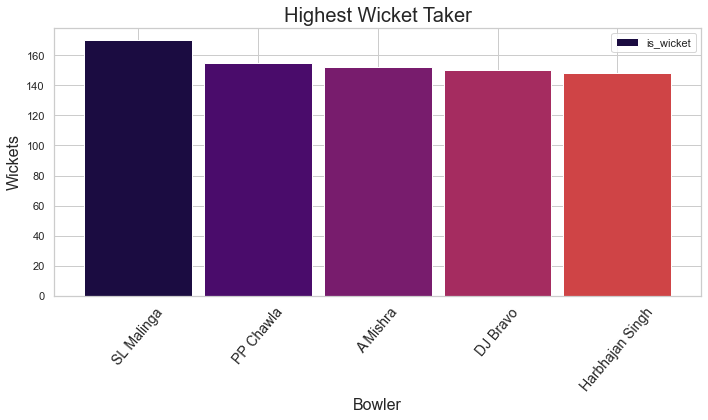

In [862]:
sns.set_style('whitegrid')

h_wick.plot(x = 'bowler', y= 'is_wicket', width = 0.9, color = sns.color_palette('inferno',8), kind='bar',figsize=(10,6))

plt.title('Highest Wicket Taker', fontsize=20)
plt.ylabel('Wickets', fontsize=16)
plt.xlabel('Bowler', fontsize=16)
plt.xticks(rotation = 50, fontsize=14)
plt.show()

Lasith Malinga is the leading wicket taker with 170 wickets.

### EDA11. Most common type of batsmen dismissal?

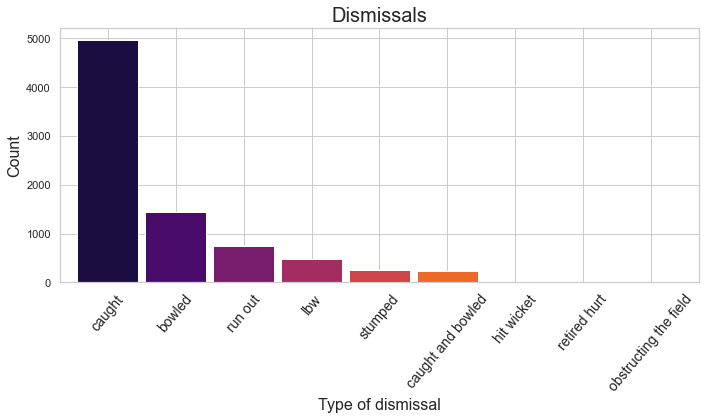

In [863]:
sns.set_style('whitegrid')

dfd1 = dfd[dfd['dismissal_kind'] != 'Not Out']
extras = dfd1['dismissal_kind'].value_counts()
extras = extras.sort_values(ascending = False).plot.bar(width = 0.9, color = sns.color_palette('inferno',8),figsize=(10,6))

plt.title('Dismissals', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Type of dismissal', fontsize=16)
plt.xticks(rotation = 50, fontsize=14)
plt.show()

When batsmen is swinging at everything it's obvious that most of the time batsmen will get caught.

### EDA12.  Most common type of extras give by bowlers?

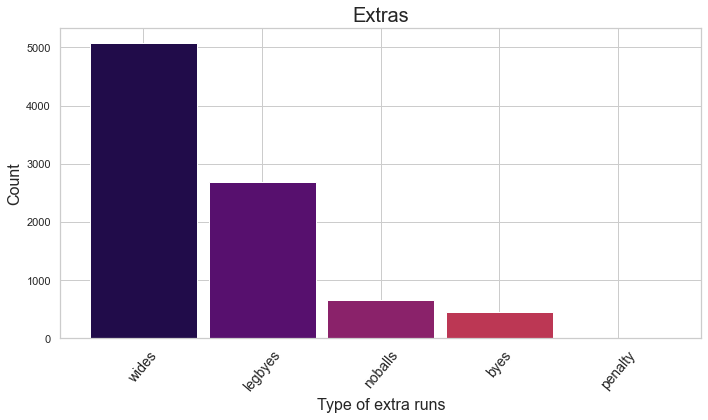

In [858]:
sns.set_style('whitegrid')

dfd2 = dfd[dfd['extras_type'] != 'Fair Delivery']
extras = dfd2['extras_type'].value_counts()
extras = extras.sort_values(ascending = False).plot.bar(width = 0.9, color = sns.color_palette('inferno',7),figsize=(10,6))

plt.title('Extras', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Type of extra runs', fontsize=16)
plt.xticks(rotation = 50, fontsize=14)
plt.show()

Bowlers tend to bowl the wider deliveries to stay away from the batsmens hitting zone

### EDA13. Highest Individual Score in IPL history?

In [800]:
high_indvr = dfd.groupby(['id','batsman']).sum().sort_values(by = 'batsman_runs', ascending=False).head().reset_index()
high_indvr.drop(columns = ['inning','overs','total_runs','is_wicket','extra_runs','season'], inplace=True)
high_indvr

,id,batsman,batsman_runs
0,335982,BB McCullum,158
1,829795,AB de Villiers,133
2,1216510,KL Rahul,132
3,1136602,RR Pant,128
4,548372,CH Gayle,128


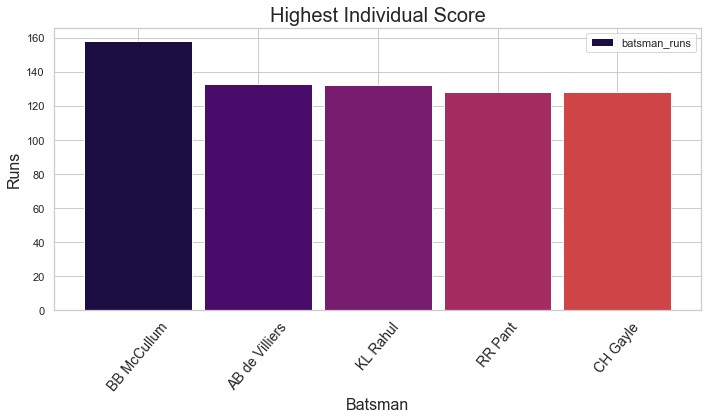

In [857]:
sns.set_style('whitegrid')

high_indvr.plot(x = 'batsman', y= 'batsman_runs', width = 0.9, color = sns.color_palette('inferno',8), kind='bar',figsize=(10,6))

plt.title('Highest Individual Score', fontsize=20)
plt.ylabel('Runs', fontsize=16)
plt.xlabel('Batsman', fontsize=16)
plt.xticks(rotation = 50, fontsize=14)
plt.show()

Brendon McCullum scored an astonishing 158 in the first ever IPL match, a record that hasn't been broken yet. 

### EDA14. Highest wickets taken by any bowler in a match?

In [802]:
high_indvw = dfd.groupby(['id','bowler']).sum().sort_values(by = 'is_wicket', ascending=False).head().reset_index()
high_indvw.drop(columns = ['inning','overs','total_runs','batsman_runs','extra_runs'], inplace=True)
high_indvw

,id,bowler,season,is_wicket
0,598056,DJG Sammy,48312,6
1,336005,Sohail Tanvir,48192,6
2,1178394,AS Joseph,48456,6
3,980963,AD Russell,50400,6
4,598054,JD Unadkat,50325,5


### EDA15. Season wise distribution of Orange Cap winner?

In [803]:
oc1 = dfd.groupby(['season','batsman']).sum().reset_index()
oc1 = oc1.sort_values(by = ['season','batsman_runs']).reset_index()
oc1.head()

,index,season,batsman,id,inning,overs,batsman_runs,total_runs,is_wicket,extra_runs
0,3,2008,A Mukund,336033,2,19.7,0,0,1,0
1,15,2008,Abdur Razzak,672046,4,37.1,0,0,0,0
2,58,2008,L Balaji,1680145,10,89.9,0,2,1,2
3,66,2008,M Muralitharan,1008015,3,48.9,0,0,1,0
4,75,2008,MM Patel,336008,1,15.6,0,0,0,0


In [804]:
entries = []
for i in range(2008,2021):
    oc2 = ((oc1[oc1['season']==i]).iloc[-1])
    entries.append(oc2)
orange_cap = pd.DataFrame(entries, columns = ['season', 'batsman', 'batsman_runs']).reset_index()
orange_cap.drop(columns =['index'],inplace = True)

orange_cap

,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,515
4,2012,CH Gayle,595
5,2013,MEK Hussey,728
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,DA Warner,646
9,2017,DA Warner,413


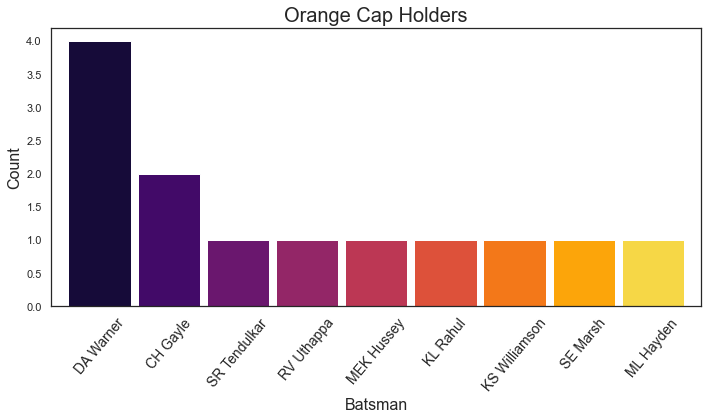

In [840]:
sns.set_style('whitegrid')

m_ocaps = orange_cap['batsman'].value_counts()
m_ocaps = m_ocaps.sort_values(ascending = False).plot.bar(width = 0.9, color = sns.color_palette('inferno',9), figsize=(10,6))

plt.title('Orange Cap Holders', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Batsman', fontsize=16)
plt.xticks(rotation = 50, fontsize=14)
plt.show()

David Warner is the most Orange caped player, 4 times

### EDA16. Season wise distribution of Purple Cap winner?

In [806]:
pc1 = dfd.groupby(['season','bowler']).sum().reset_index()
pc1 = pc1.sort_values(by = ['season','is_wicket']).reset_index()
pc1.head()

,index,season,bowler,id,inning,overs,batsman_runs,total_runs,is_wicket,extra_runs
0,4,2008,A Symonds,14783476,88,576.5,94,106,0,12
1,10,2008,Abdur Razzak,4704322,14,145.6,23,29,0,6
2,15,2008,CK Kapugedera,5712222,28,208.7,49,49,0,0
3,16,2008,CL White,2351874,7,100.8,22,24,0,2
4,41,2008,K Goel,4031796,12,124.2,25,25,0,0


In [807]:
entries = []
for i in range(2008,2021):
    pc2 = ((pc1[pc1['season']==i]).iloc[-1])
    entries.append(pc2)
purple_cap = pd.DataFrame(entries, columns = ['season', 'bowler', 'is_wicket']).reset_index()
purple_cap.drop(columns =['index'],inplace = True)

purple_cap

,season,bowler,is_wicket
0,2008,Sohail Tanvir,24
1,2009,RP Singh,26
2,2010,PP Ojha,22
3,2011,SL Malinga,23
4,2012,SP Narine,26
5,2013,DJ Bravo,31
6,2014,MM Sharma,26
7,2015,DJ Bravo,28
8,2016,AD Russell,17
9,2017,B Kumar,22


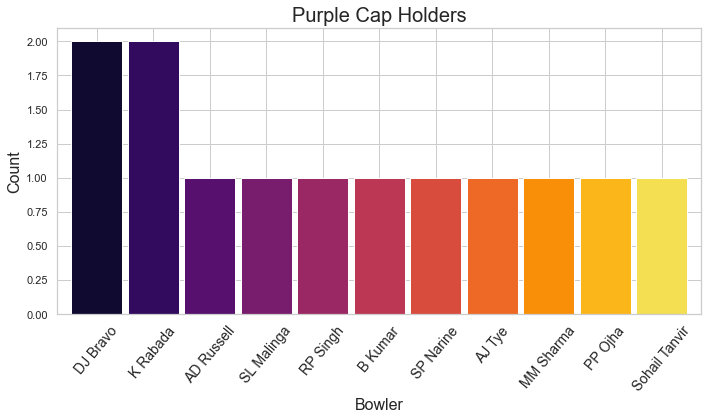

In [867]:
sns.set_style('whitegrid')

m_pcaps = purple_cap['bowler'].value_counts()
m_pcaps = m_pcaps.sort_values(ascending = False).plot.bar(width = 0.9, color = sns.color_palette('inferno',11),figsize=(10,6))

plt.title('Purple Cap Holders', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Bowler', fontsize=16)
plt.xticks(rotation = 50, fontsize=14)
plt.show()

### EDA17. Teams performance against each other? 

In [809]:
def team1_vs_team2(team1,team2):
    
    t1_t2=dfm[((dfm['team1']==team1)|(dfm['team2']==team1))&((dfm['team1']==team2)|(dfm['team2']==team2))]
    
    colors = {'Chennai Super Kings':'#fcff63', 'Mumbai Indians':'#004f91', 'Kolkata Knight Riders':'#3a225d',
              'Sunrisers Hyderabad':'#ff992a', 'Rajasthan Royals':'#cba92b', 'Royal Challengers Bangalore':'#ff3030',
              'Delhi Capitals':'#5fc9fa', 'Kings XI Panjab':'#a8a9ac'}
    c = t1_t2['winner'].apply(lambda x: colors[x])
    
    sns.countplot(x='season', hue='winner', data=t1_t2, palette = c)
    
    fig=plt.gcf()
    fig.set_size_inches(15,8)
    plt.title('Head to Head', fontsize=20)
    plt.ylabel('Matches won', fontsize=16)
    plt.xlabel('Seasons', fontsize=16)
    plt.xticks(fontsize = 16)
    plt.legend(loc = 'upper center')
    plt.show()

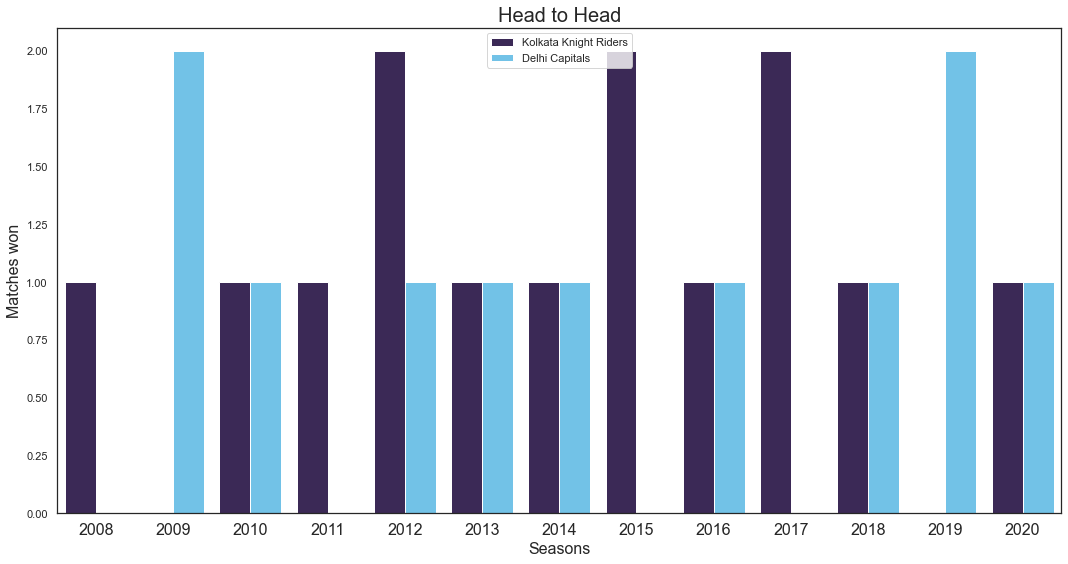

In [810]:
team1_vs_team2('Delhi Capitals','Kolkata Knight Riders')

### EDA18. Finals Played vs Finals Won?

In [864]:
sns.set_style('whitegrid')

finals = dfm.drop_duplicates(subset=['season'],keep='last')
finals = finals[['id','season','team1','team2','toss_winner','toss_decision','winner']]

finals1 = pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
finals1.rename({'index':'team',0:'count'},axis=1,inplace=True)

finals2 = finals['winner'].value_counts().reset_index()

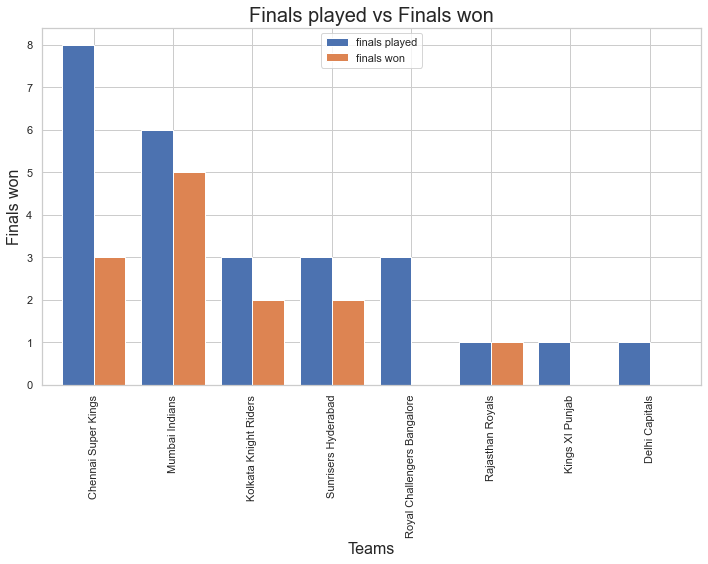

In [866]:
most_finals = finals1.merge(finals2,left_on='team',right_on='index',how='outer')
most_finals = most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals played','winner':'finals won'},inplace=True,axis=1)

most_finals.plot.bar(width=0.8, figsize = (10,8))

plt.title('Finals played vs Finals won', fontsize=20)
plt.ylabel('Finals won', fontsize=16)
plt.xlabel('Teams', fontsize=16)
plt.legend(loc = 'upper center')
plt.show()